In [1]:
# The code is loosely based on the example in
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
#
# Copyright © 2019 Ehsan Khatami

import numpy as np

import tensorflow
import tensorflow.python.keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [34]:
# Data sizes
N  = 20000

# Network parameters
N_in  = 2
N_hid = 30
N_out = 2

# Generating the data (two number to be multiplied) and their labels (their product)
X  = np.random.random(size=2*N).reshape(N,2)

Y = np.zeros([N,2])
Y[:,0] = X[:,0]*X[:,1]

# This is becuase the output has two neurons and we use softmax
Y[:,1] = 1 - Y[:,0]

In [35]:
# Creating training and testing data sets
X_train = X[:N*8//10,:]
X_test = X[N*8//10:,:]
Y_train = Y[:N*8//10,:]
Y_test = Y[N*8//10:,:]

In [42]:
# Building the neural network
model = Sequential()
model.add(Dense(N_hid, input_dim=N_in, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(N_out, activation='softmax'))

In [43]:
# Specifying the loss function, the optimizer and how we want to measure the success
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [44]:
# Training the network using the fit option
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=100, batch_size=100)

Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - 1s 45us/step - loss: 0.1897 - acc: 0.8358 - val_loss: 0.1742 - val_acc: 0.8405
Epoch 2/100
16000/16000 [==============================] - 0s 21us/step - loss: 0.1689 - acc: 0.8429 - val_loss: 0.1645 - val_acc: 0.8405
Epoch 3/100
16000/16000 [==============================] - 0s 21us/step - loss: 0.1529 - acc: 0.8429 - val_loss: 0.1388 - val_acc: 0.8405
Epoch 4/100
16000/16000 [==============================] - 0s 22us/step - loss: 0.1059 - acc: 0.8562 - val_loss: 0.0666 - val_acc: 0.9170
Epoch 5/100
16000/16000 [==============================] - 0s 21us/step - loss: 0.0444 - acc: 0.9773 - val_loss: 0.0382 - val_acc: 0.9798
Epoch 6/100
16000/16000 [==============================] - 0s 21us/step - loss: 0.0367 - acc: 0.9851 - val_loss: 0.0365 - val_acc: 0.9835
Epoch 7/100
16000/16000 [==============================] - 0s 21us/step - loss: 0.0360 - acc: 0.9844 - val_loss: 0.0360 - v

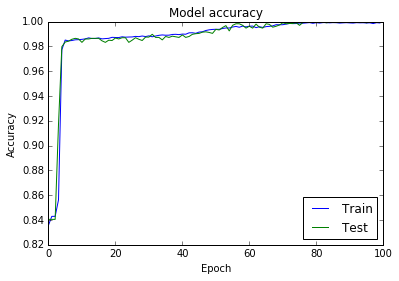

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

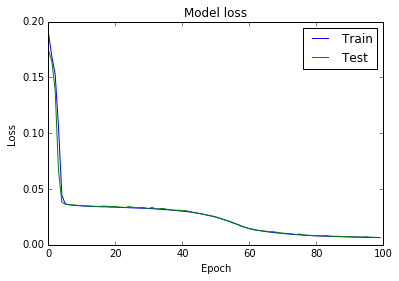

In [46]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

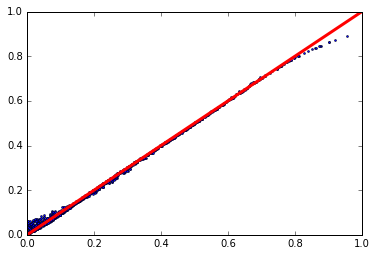

In [47]:
N = 1000
X  = np.random.random(size=2*N).reshape(N,2)
Y = np.zeros([N,2])
Y[:,0] = X[:,0]*X[:,1]
Y[:,1] = 1 - Y[:,0]

y_pred = model.predict(X)

plt.plot(Y[:,0],y_pred[:,0],'o',markersize=2)
plt.plot([0,1],[0,1],'r-',linewidth=3)
plt.show()